<a href="https://colab.research.google.com/github/daniellecd/portfolio/blob/master/Queda_de_idosos/Fratura_femur_idosos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão do quantitativo de fraturas do fêmur em idosos**



## **Instalação dos pacotes necessários**

In [ ]:
#Instalação dos pacotes necessárias
!pip install pystan
!pip install fbprophet

In [ ]:
# Importação das bibliotecas necessárias 
import pandas as pd
import numpy as np

import fbprophet
from fbprophet import Prophet

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

## **Importação dos dados**

In [ ]:
#Leitura do dataset e cinco primeiras linhas
df = pd.read_excel('/content/Fratura_Femur_Prophet.xlsx')
df.head()

,Data,Fratura_femur
0,2008-01-01,1505
1,2008-02-01,2424
2,2008-03-01,2499
3,2008-04-01,2440
4,2008-05-01,2739


In [ ]:
df.tail()

,Data,Fratura_femur
139,2019-08-01,6069
140,2019-09-01,5665
141,2019-10-01,5689
142,2019-11-01,5118
143,2019-12-01,5006


In [ ]:
# Verificação dos tipos de dados
df.dtypes

Data             datetime64[ns]
Fratura_femur             int64
dtype: object

In [ ]:
# Renomeando as colunas, conforme requisitado pela biblioteca Prophet, e visualização das cinco primeiras linhas
df.columns = ["ds","y"]
df.head()

,ds,y
0,2008-01-01,1505
1,2008-02-01,2424
2,2008-03-01,2499
3,2008-04-01,2440
4,2008-05-01,2739


In [ ]:
df.head()

,ds,y
0,2008-01-01,1505
1,2008-02-01,2424
2,2008-03-01,2499
3,2008-04-01,2440
4,2008-05-01,2739


## **Modelo Preditivo - Prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
# Ajuste do modelo
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

In [ ]:
# Criando datas futuras para previsões em um dataframe
future = model.make_future_dataframe(periods = 24, freq='M')

In [ ]:
# Visualização das cinco últimas linhas - última da da previsão é Dezembro de 2021
future.tail()

,ds
163,2021-07-31
164,2021-08-31
165,2021-09-30
166,2021-10-31
167,2021-11-30


In [ ]:
# Previsão dos dados 
pred = model.predict(future)

In [ ]:
# Visualização dos dados gerados pelo modelo
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,2688.117036,2135.016106,2495.181981,2688.117036,2688.117036,-373.509787,-373.509787,-373.509787,-373.509787,-373.509787,-373.509787,0.0,0.0,0.0,2314.607250
1,2008-02-01,2704.312586,2189.305716,2550.814053,2704.312586,2704.312586,-341.501203,-341.501203,-341.501203,-341.501203,-341.501203,-341.501203,0.0,0.0,0.0,2362.811383
2,2008-03-01,2719.463261,2246.190530,2626.006274,2719.463261,2719.463261,-272.530122,-272.530122,-272.530122,-272.530122,-272.530122,-272.530122,0.0,0.0,0.0,2446.933139
3,2008-04-01,2735.658811,2198.672111,2587.443406,2735.658811,2735.658811,-335.455536,-335.455536,-335.455536,-335.455536,-335.455536,-335.455536,0.0,0.0,0.0,2400.203275
4,2008-05-01,2751.331923,2552.031767,2922.311793,2751.331923,2751.331923,-17.905048,-17.905048,-17.905048,-17.905048,-17.905048,-17.905048,0.0,0.0,0.0,2733.426875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-07-31,5877.475599,6202.384725,6577.185996,5845.028759,5907.770707,508.849396,508.849396,508.849396,508.849396,508.849396,508.849396,0.0,0.0,0.0,6386.324995
164,2021-08-31,5903.783088,6062.659570,6447.104920,5868.988540,5936.096147,356.545748,356.545748,356.545748,356.545748,356.545748,356.545748,0.0,0.0,0.0,6260.328836
165,2021-09-30,5929.241949,5950.718846,6336.350005,5891.420263,5963.751993,209.879672,209.879672,209.879672,209.879672,209.879672,209.879672,0.0,0.0,0.0,6139.121621
166,2021-10-31,5955.549438,5665.736600,6036.024422,5915.769745,5992.985620,-94.948464,-94.948464,-94.948464,-94.948464,-94.948464,-94.948464,0.0,0.0,0.0,5860.600974


In [ ]:
# Visulaização das cinco primeiras linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-01-01,2314.607250,2135.016106,2495.181981
1,2008-02-01,2362.811383,2189.305716,2550.814053
2,2008-03-01,2446.933139,2246.190530,2626.006274
3,2008-04-01,2400.203275,2198.672111,2587.443406
4,2008-05-01,2733.426875,2552.031767,2922.311793


In [ ]:
# Visulaização das cinco últimas linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail(11)

,ds,yhat,yhat_lower,yhat_upper
157,2021-01-31,5438.336031,5242.685451,5622.485738
158,2021-02-28,5476.917064,5283.184274,5656.632562
159,2021-03-31,5526.727452,5350.761403,5711.074563
160,2021-04-30,5860.164635,5671.227297,6045.274236
161,2021-05-31,5724.654548,5530.354585,5931.090071
162,2021-06-30,6332.064302,6140.070727,6533.832248
163,2021-07-31,6386.324995,6202.384725,6577.185996
164,2021-08-31,6260.328836,6062.659570,6447.104920
165,2021-09-30,6139.121621,5950.718846,6336.350005
166,2021-10-31,5860.600974,5665.736600,6036.024422


## **Análise gráfica do modelo de previsão**

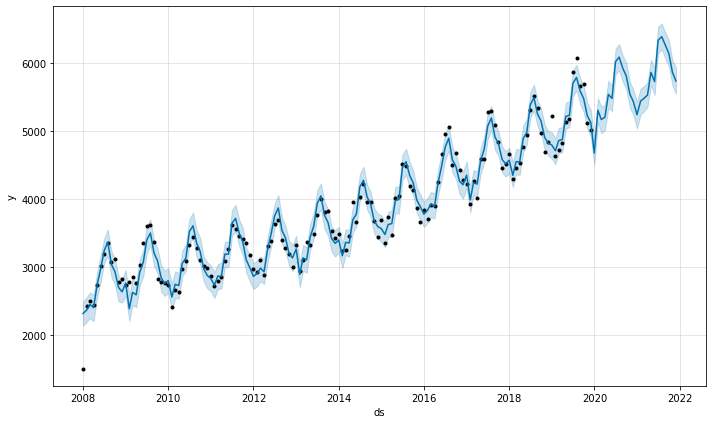

In [ ]:
#Visualização gráfica dos dados - Período de 2008 a 2021
ax = model.plot(pred);

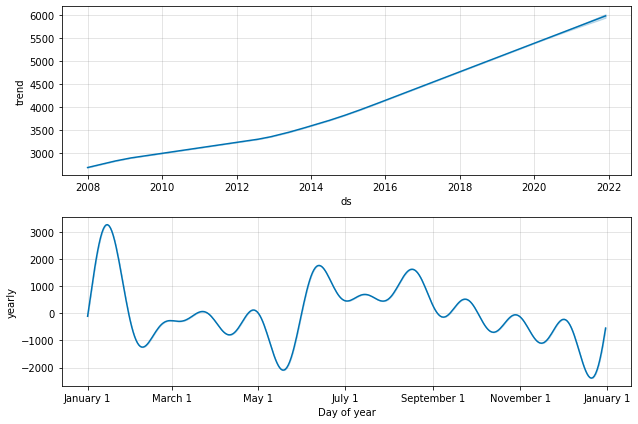

In [ ]:
#visualizacao de cada componente do modelo previsto. Trend é a tendências e yearly a sazonalidade
model.plot_components(pred);

Conforme observado nos gráficos acima, há uma tendência de crescimento no número de fraturas do fêmurque poderá ocorrer com os idosos, podendo afetar quase 65 mil pessoas ao longo do ano de 2021, com média de 5,9 mil quedas por mês.

Vale ressaltar que o perfil de ocorrência da fratura do fêmur tem estreita semelhança com o perfil de quedas de idosos, indicativo de que a ocorrência dessa morbidade está relação ao evento adverso da queda.